#Delivery_time -> Predict delivery time using sorting time 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
print("Libraries imported")


Libraries imported


In [ ]:
dataset = pd.read_csv('/content/delivery_time.csv')

In [ ]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
dataset.columns = ['DeliveryTime', 'SortingTime']

In [ ]:
dataset.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
dataset.shape #Check number of rows and columns

(21, 2)

In [ ]:

dataset.info() #checking null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
dataset.describe() # Describe data set parameters

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


#Visualisation

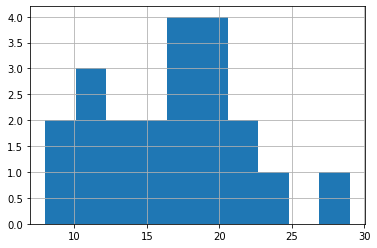

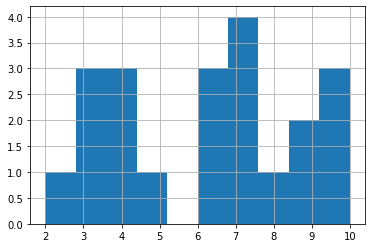

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


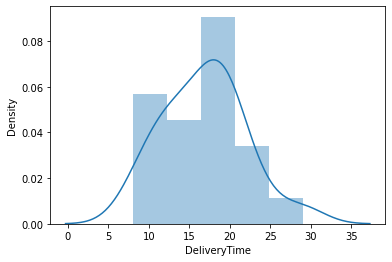

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


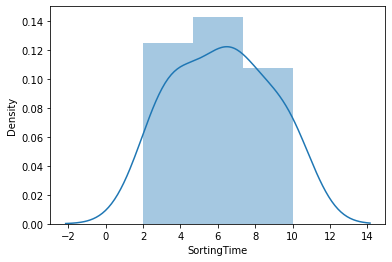

In [ ]:
#Visualisation
dataset['DeliveryTime'].hist()
plt.show()
dataset['SortingTime'].hist()
plt.show()
sns.distplot(dataset['DeliveryTime'])
plt.show()
sns.distplot(dataset['SortingTime'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


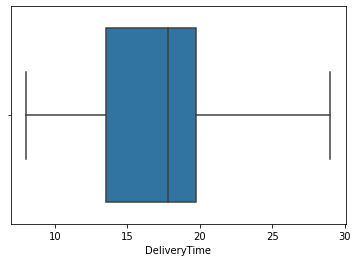

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


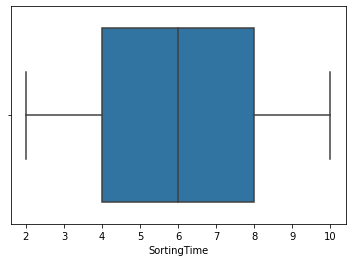

In [ ]:
sns.boxplot(dataset['DeliveryTime'])
plt.show()
sns.boxplot(dataset['SortingTime'])

No outliers observed on both delivery time and sorting time

#Correlation between input and output variables using scatter plot

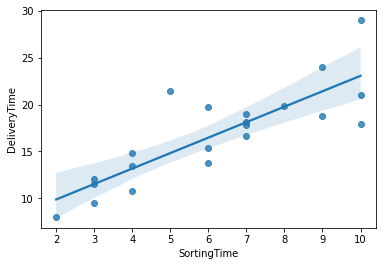

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [ ]:
sns.regplot(x=dataset['SortingTime'],y=dataset['DeliveryTime'])
plt.show()
dataset.corr()

0.825597 shows high positive correlation between variables

#Row data modeling

In [ ]:
X=dataset.iloc[:,0].values
y=dataset.iloc[:,1].values

In [ ]:
X

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [ ]:
y

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =0)

In [ ]:
model1 = smf.ols("DeliveryTime~SortingTime",data = dataset).fit() #ordinary least squaring method
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        16:07:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5])

In [ ]:
#Predict for sorting time 7,10
newdata=pd.Series([7,10])
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])
print(newdata)
print(data_pred)

0     7
1    10
dtype: int64
   SortingTime
0            7
1           10


In [ ]:
model1.pvalues

Intercept      0.001147
SortingTime    0.000004
dtype: float64

In [ ]:
model1.predict(data_pred) # for sorting time 7 and 10


0    18.125873
1    23.072933
dtype: float64

In [ ]:
#model parameter
model1.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [ ]:
from ml_metrics import mse
pred_1=model1.predict(dataset['SortingTime'])
rmse_1=np.sqrt(mse(dataset['DeliveryTime'],pred_1))
print("RMSE for First model is:",rmse_1)

RMSE for First model is: 2.7916503270617654


In [ ]:
# Manually calculate for 5 and 6 years experience salary
DeliveryTime_7 = (6.582734) + (1.649020)*(7)
DeliveryTime_10 = (6.582734) + (1.649020)*(10)
print('For Sorting time 7, Delivery time - ', DeliveryTime_7)
print('For Sorting time 7, Delivery time - ', DeliveryTime_10)

For Sorting time 7, Delivery time -  18.125874
For Sorting time 7, Delivery time -  23.072933999999997


Predicted value and calculated value are correct for Delivey time against sorting time of 7 nd 10

#Using Standardization on input and output variable

In [ ]:
from sklearn.preprocessing import StandardScaler
array_df=dataset.values
standard_df= StandardScaler().fit(array_df).transform(array_df)
standard_df[0:5]

array([[ 0.84986692,  1.53562462],
       [-0.66449036, -0.88298415],
       [ 0.59747404, -0.07678123],
       [ 1.45560983,  1.13252315],
       [ 2.46518134,  1.53562462]])

In [ ]:
import statsmodels.api as sm
X=standard_df[:,1]
y=standard_df[:,0]
model2=sm.OLS(y,X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                              42.95
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    2.19e-06
Time:                        16:07:24   Log-Likelihood:                         -17.759
No. Observations:                  21   AIC:                                      37.52
Df Residuals:                      20   BIC:                                      38.56
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8260      0.126      6.553      0.000       0.563       1.089
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred_2=model2.predict(X)
rmse_2=np.sqrt(mse(y,pred_2))
print("RMSE for second model is:",rmse_2)

RMSE for second model is: 0.563674130290079


#Using Normalization on x and y

In [ ]:
# Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
array_df=dataset.values
norm_df= MinMaxScaler().fit(array_df).transform(array_df)
norm_df[0:5]

array([[0.61904762, 1.        ],
       [0.26190476, 0.25      ],
       [0.55952381, 0.5       ],
       [0.76190476, 0.875     ],
       [1.        , 1.        ]])

In [ ]:
X=norm_df[:,1]
y=norm_df[:,0]
model3=sm.OLS(y,X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              213.7
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    3.86e-12
Time:                        16:07:25   Log-Likelihood:                          11.409
No. Observations:                  21   AIC:                                     -20.82
Df Residuals:                      20   BIC:                                     -19.77
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7548      0.052     14.620      0.000       0.647       0.863
==============================================================================
Omnibus:                        1.543   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                0.423
Skew:                           0.259   Prob(JB):                        0.809
Kurtosis:                       3.465   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred_3=model3.predict(X)
rmse_3=np.sqrt(mse(y,pred_3))
print("RMSE for third model is:",rmse_3)

RMSE for third model is: 0.14054714818280667


#Transformation on Y

In [ ]:
dataset2=dataset.copy()
dataset2['TDeliveryTime']=np.log(dataset2['DeliveryTime'])
dataset2.head()

,DeliveryTime,SortingTime,TDeliveryTime
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296


In [ ]:
dataset2['SortingTime'].corr(dataset2['TDeliveryTime'])

0.8431772637224149

In [ ]:
model4=smf.ols('TDeliveryTime~SortingTime',data=dataset2).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TDeliveryTime   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.59e-06
Time:                        16:07:25   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred_4=model4.predict(dataset2['SortingTime'])
rmse_4=np.sqrt(mse(dataset2['TDeliveryTime'],pred_4))
print("RMSE for Fourth model is:",rmse_4)

RMSE for Fourth model is: 0.16696276106302863


#Consolidated Model Result

In [ ]:
result_dataset=pd.DataFrame({'Models':['Row data modeling','Standardization','Normalization','Transformation on y'],'R values':[0.682,0.682,0.914,0.711],
                        'RMSE':[rmse_1,rmse_2,rmse_3,rmse_4]})
result_dataset

,Models,R values,RMSE
0,Row data modeling,0.682,2.791650
1,Standardization,0.682,0.563674
2,Normalization,0.914,0.140547
3,Transformation on y,0.711,0.166963


# Model 3, Normalization is having High R squared value of 0.914 and Least error of 14%